<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Statistics Fundamentals, Part 1: Solution

_Authors: Alexander Egorenkov (DC), Amy Roberts (NYC)_

---

<a id="learning-objectives"></a>
## Learning Objectives
- Compute dot products, matrix multiplications, and vector norms by hand and using NumPy.
- Code summary statistics using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.
- Create basic data visualizations, including scatterplots, box plots, and histograms.
- Describe characteristics and trends in a data set using visualizations.
- Describe the bias and variance of statistical estimators.
- Identify a normal distribution within a data set using summary statistics and data visualizations.

### Lesson Guide
- [Where Are We in the Data Science Workflow?](#where-are-we-in-the-data-science-workflow)
- [Linear Algebra Review](#linear-algebra-review)
    - [Scalars, Vectors, and Matrices](#scalars-vectors-and-matrices)
	- [Basic Matrix Algebra](#basic-matrix-algebra)
	- [Dot Product](#dot-product)
	- [Matrix Multiplication](#matrix-multiplication)
	- [N-Dimensional Space](#n-dimensional-space)
	- [Vector Norm](#vector-norm)
- [Linear Algebra Applications to Machine Learning](#linear-algebra-applications-to-machine-learning)
	- [Distance Between Actual Values and Predicted Values](#distance-between-actual-values-and-predicted-values)
	- [Mean Squared Error](#mean-squared-error)
	- [Least Squares](#least-squares)
- [Code-Along: Examining the Titanic Data Set](#codealong-examining-the-titanic-dataset)
- [Descriptive Statistics Fundamentals](#descriptive-statistics-fundamentals)
	- [Measures of Central Tendency](#measures-of-central-tendency)
	- [Math Review](#math-review)
	- [Measures of Dispersion: Standard Deviation and Variance](#measures-of-dispersion-standard-deviation-and-variance)
- [Our First Model](#our-first-model)
- [A Short Introduction to Model Bias and Variance](#a-short-introduction-to-model-bias-and-variance)
	- [Bias-Variance Decomposition](#bias-variance-decomposition)
	- [Example Using Bessel's Correction](#example-using-bessels-correction)
- [Correlation and Association](#correlation-and-association)
	- [Code-Along: Correlation in Pandas](#codealong-correlation-in-pandas)
- [The Normal Distribution](#the-normal-distribution)
	- [What is the Normal Distribution?](#what-is-the-normal-distribution)
	- [Skewness](#skewness)
	- [Kurtosis](#kurtosis)
- [Determining the Distribution of Your Data](#determining-the-distribution-of-your-data)
	- [Exercise](#exercise)
- [Lesson Review](#topic-review)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline

<a id="where-are-we-in-the-data-science-workflow"></a>
## Where are we in the data science workflow?

![Data Science Workflow](../assets/images/data-science-workflow.png)

<a id="linear-algebra-review"></a>
## Linear Algebra Review
---
**Objective:** Compute dot products, matrix multiplications, and vector norms by hand and using NumPy.

<a id="why-linear-algebra"></a>
### Why Use Linear Algebra in Data Science?

Linear models are efficient and well understood. They can often closely approximate nonlinear solutions, and they scale to high dimensions without difficulty.

Because of these desirable properties, linear algebra is a need-to-know subject for machine learning. In fact, it forms the basis of foundational models such as linear regression, logistic regression, and principal component analysis (PCA). 

Unsurprisingly, advanced models such as neural networks and support vector machines rely on linear algebra as their "trick" for impressive speedups. Modern-day GPUs are essentially linear algebra supercomputers. And, to utilize their power on a GPU, models must often be carefully formulated in terms of vectors and matrices.

More than that, todya's advanced models build upon the simpler foundational models. Each neuron in a neural net is essentially a logistic regressor! Support vector machines utilize a kernel trick to craftily make problems linear that would not otherwise appear to be.

Although we do not have time in this course to comprehensively discuss linear algebra, we highly recommend you become fluent!

<a id="scalars-vectors-and-matrices"></a>
### Scalars, Vectors, and Matrices

A **scalar** is a single number. Here, symbols that are lowercase single letters refer to scalars. For example, the symbols $a$ and $v$ are scalars that might refer to arbitrary numbers such as $5.328$ or $7$. An example scalar would be:

$$a$$

A **vector** is an ordered sequence of numbers. Here, symbols that are lowercase single letters with an arrow — such as $\vec{u}$ — refer to vectors. An example vector would be:

$$\vec{u} = \left[ \begin{array}{c}
1&3&7
\end{array} \right]$$

In [2]:
u = np.array([1, 3, 7])
u

array([1, 3, 7])

An $m$ x $n$ **matrix** is a rectangular array of numbers with $m$ rows and $n$ columns. Each number in the matrix is an entry. Entries can be denoted $a_{ij}$, where $i$ denotes the row number and $j$ denotes the column number. Note that, because each entry $a_{ij}$ is a lowercase single letter, a matrix is an array of scalars:

$$\mathbf{A}= \left[ \begin{array}{c}
a_{11} & a_{12} & ... & a_{1n}  \\
a_{21} & a_{22} & ... & a_{2n}  \\
... & ... & ... & ... \\
a_{m1} & a_{m2} & ... & a_{mn}
\end{array} \right]$$

Matrices are referred to using bold uppercase letters, such as $\mathbf{A}$. A bold font face is used to distinguish matrices from sets.

In [3]:
m = np.array([[1, 3, 7], [4, 6, 3], [2, 5, 6]])
m

array([[1, 3, 7],
       [4, 6, 3],
       [2, 5, 6]])

Note that in Python, a matrix is just a list of lists! The outermost list is a list of rows.

<a id="basic-matrix-algebra"></a>
### Basic Matrix Algebra


#### Addition and Subtraction
Vector **addition** is straightforward. If two vectors are of equal dimensions (The vectors are shown here as column vectors for convenience only):

$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right],  \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$

In [4]:
v = np.array([1, 3, 7])
w = np.array([1, 0, 1])

$\vec{v} + \vec{w} =
\left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] + \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right] = 
\left[ \begin{array}{c}
1+1 \\
3+0 \\
7+1
\end{array} \right] = 
\left[ \begin{array}{c}
2 \\
3 \\
8
\end{array} \right]
$

(Subtraction is similar.)

In [5]:
v + w

array([2, 3, 8])

In [6]:
v-w

array([0, 3, 6])

#### Scalar Multiplication
We scale a vector with **scalar multiplication**, multiplying a vector by a scalar (single quantity):

$ 2 \cdot \vec{v} = 2\left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] = 
 \left[ \begin{array}{c}
2 \cdot 1 \\
2 \cdot 3 \\
2 \cdot 7
\end{array} \right] = 
 \left[ \begin{array}{c}
2 \\
6 \\
14
\end{array} \right]$ 

In [7]:
2 * np.array([1, 3, 7])
np.multiply(v, 2)

array([ 2,  6, 14])

<a id="dot-product"></a>
### Dot Product
The **dot product** of two _n_-dimensional vectors is:

$ \vec{v} \cdot \vec{w} =\sum _{i=1}^{n}v_{i}w_{i}=v_{1}w_{1}+v_{2}w_{2}+\cdots +v_{n}w_{n} $

So, if:

$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right], \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$

$ \vec{v} \cdot \vec{w} = 1 \cdot 1 + 3 \cdot 0 + 7 \cdot 1 = 8 $

In [8]:
v = np.array([1, 3, 7])
w = np.array([1, 0, 1])

# Calculate the dot product of v and w using np.dot.
v.dot(w)

8

<a id="matrix-multiplication"></a>
### Matrix Multiplication
**Matrix multiplication**, $\mathbf{A}_{mn}$ x $\mathbf{B}_{ij}$, is valid when the left matrix has the same number of columns as the right matrix has rows ($n = i$). Each entry is the dot product of corresponding row and column vectors.

![](../assets/images/matrix-multiply-a.gif)
(Image: mathisfun.com!)

The dot product illustrated above is: $1 \cdot 7 + 2 \cdot 9 + 3 \cdot 11 = 58$. Can you compute the rest of the dot products by hand?

If the product is the $2$ x $2$ matrix $\mathbf{C}_{mj}$, then:

+ Matrix entry $c_{12}$ (its FIRST row and SECOND column) is the dot product of the FIRST row of $\mathbf{A}$ and the SECOND column of $\mathbf{B}$.

+ Matrix entry $c_{21}$ (its SECOND row and FIRST column) is the dot product of the SECOND row of $\mathbf{A}$ and the FIRST column of $\mathbf{B}$.

Note that if the first matrix is $m$ x $n$ ($m$ rows and $n$ columns) and the second is  $i$ x $j$ (where $n = i$), then the final matrix will be $m$ x $j$. For example, below we have $2$ x $3$ multiplied by $3$ x $2$, which results in a $2$ x $2$ matrix. Can you see why?

In [9]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8], [9, 10], [11, 12]])

A.dot(B)

array([[ 58,  64],
       [139, 154]])

In [10]:
C = np.array([[7], [9], [11]])
A.dot(C)

array([[ 58],
       [139]])

Make sure you can compute this by hand!

<a id="n-dimensional-space"></a>
### N-Dimensional Space

We often refer to vectors as elements of an $n$-dimensional space. The symbol $\mathbb{R}$ refers to the set of all real numbers (written in uppercase "blackboard bold" font). Because this contains all reals, $3$ and $\pi$ are **contained in** $\mathbb{R}$. We often write this symbolically as $3 \in \mathbb{R}$ and $\pi \in \mathbb{R}$.

To get the set of all pairs of real numbers, we would essentially take the product of this set with itself (called the Cartesian product) — $\mathbb{R}$ x $\mathbb{R}$, abbreviated as $\mathbb{R}^2$. This set — $\mathbb{R}^2$ — contains all pairs of real numbers, so $(1, 3)$ is **contained in** this set. We write this symbolically as $(1, 3) \in \mathbb{R}^2$.

+ In 2-D space ($\mathbb{R}^2$), a point is uniquely referred to using two coordinates: $(1, 3) \in \mathbb{R}^2$.
+ In 3-D space ($\mathbb{R}^3$), a point is uniquely referred to using three coordinates: $(8, 2, -3) \in \mathbb{R}^3$.
+ In $n$-dimensional space ($\mathbb{R}^n$), a point is uniquely referred to using $n$ coordinates.

Note that these coordinates of course are isomorphic to our vectors! After all, coordinates are ordered sequences of numbers, just as we define vectors to be ordered sequences of numbers. So, especially in machine learning, we often visualize vectors of length $n$ as points in $n$-dimensional space.

<a id="vector-norm"></a>
### Vector Norm

The **magnitude** of a vector, $\vec{v} \in \mathbb{R}^{n}$, can be interpreted as its length in $n$-dimensional space. Therefore it is calculable via the Euclidean distance from the origin:

$\vec{v} = \left[ \begin{array}{c}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array} \right]$

then $\| \vec{v} \| = \sqrt{v_{1}^{2} + v_{2}^{2} + ... + v_{n}^{2}} = \sqrt{v^Tv}$

E.g. if $\vec{v} = 
\left[ \begin{array}{c}
3 \\
4
\end{array} \right]$, then $\| \vec{v} \| = \sqrt{3^{2} + 4^{2}} = 5$

This is also called the vector **norm**. You will often see this used in machine learning.

In [11]:
x = np.array([3,4])

# Calculate the norm of the vector x with np.linalg.norm.
np.linalg.norm(x)

5.0

<a id="linear-algebra-applications-to-machine-learning"></a>
## Linear Algebra Applications to Machine Learning
---

<a id="distance-between-actual-values-and-predicted-values"></a>
### Distance Between Actual Values and Predicted Values
We often need to know the difference between predicted values and actual values. In 2-D space, we compute this as:
$$\| \vec{actual} - \vec{predicted} \| =\sqrt{(actual_1 - predicted_1)^2 + (actual_2 - predicted_2)^2}$$

Note that this is just the straight-line distance between the actual point and the predicted point.

<a id="mean-squared-error"></a>
### Mean Squared Error
Often, it's easier to look at the mean of the squared errors. Where $\hat{y}(\mathbf{X})$ is a vector of predicted values (a function of the data matrix $\mathbf{X}$) and $\vec{y}$ is the actual values:

$$MSE = \frac{1} {n} \| \hat{y}(\mathbf{X}) - \vec{y} \|^2$$

<a id="least-squares"></a>
### Least squares
Many machine learning models are based on the following form:

$$\min \| \hat{y}(\mathbf{X}) - \vec{y} \|$$

The goal is to minimize the distance between model predictions and actual data.

Let's see this in [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html).

<a id="codealong-examining-the-titanic-dataset"></a>
## Code-Along: Examining the Titanic Data Set

---

#### Objective: Read in the Titanic data and look at a few summary statistics.

In [12]:
# import Pandas
import pandas as pd

In [13]:
titanic = pd.read_csv('../data/titanic.csv')

#### Print out the column names:

In [14]:
# Preview columns
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

#### Print out the dimensions of the DataFrame using the `.shape` attribute:

In [15]:
# Preview data dimensions
titanic.shape

(891, 11)

#### Print out the data types of the columns using the `.dtypes` attribute:

In [16]:
# What are the column data types?
titanic.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

#### Print out the first five rows of the data using the built-in `.head()` function:

In [17]:
# Look at the first 5 rows
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Use the built-in  `.value_counts()` function to count the values of each type in the `pclass` column:

In [18]:
# Can we preview the plcass variable?
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

#### Pull up descriptive statistics for each variable using the built-in `.describe()` function:

In [19]:
# Pull up descriptive statistics for each variables
titanic.describe(include='all')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Theobald, Mr. Thomas Leonard",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [20]:
# Uh oh, we have some missing values, but we won't do anything with them for now

### Diagnosing Data Problems

- Whenever you get a new data set, the fastest way to find mistakes and inconsistencies is to look at the descriptive statistics.
  - If anything looks too high or too low relative to your experience, there may be issues with the data collection.
- Your data may contain a lot of missing values and may need to be cleaned meticulously before they can be combined with other data.
  - You can take a quick average or moving average to smooth out the data and combine that to preview your results before you embark on your much longer data-cleaning journey.
  - Sometimes filling in missing values with their means or medians will be the best solution for dealing with missing data. Other times, you may want to drop the offending rows or do real imputation.

<a id="descriptive-statistics-fundamentals"></a>
## Descriptive Statistics Fundamentals
---

- **Objective:** Code summary statistics using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.

### A Quick Review of Notation

The sum of a constant $k$, $n$ times
$$\sum_{i=1}^nk$$

In [21]:
# k + k + k + k + ... + k

> It is often helpful to think of these sums as `for` loops. For example, the equation can be compactly computed like so:

```
total = 0

# For i from 1 up to and including n, add k to the sum.
for i in range(1, n+1):
    total += k
```

> Or, even more succinctly (using a generator comprehension):

```
total = sum(k for i in range(1, n+1))
```

The sum of all numbers from 1 up to and including $n$:
$$\sum_{i=1}^ni$$

In [22]:
# 1 + 2 + 3 + ... + n

> ```
total = sum(i for i in range(1, n+1))
```

The sum of all $x$ from the first $x$ entry to the $n$th $x$ entry:
$$\sum_{i=0}^nx_i$$

In [23]:
# x_1 + x_2 + x_3 + ... + x_n

> ```
total = sum(xi in x)   # or just sum(x)
```

#### Code-Along

_Optional: Write down the mathematical notation for the following questions:_

In [24]:
# Compute the sum of 7 4s using base Python
print("Sum of 7 4s: {}".format(sum([4, 4, 4, 4, 4, 4, 4])))

Sum of 7 4s: 28


$$\sum_{i=1}^{7}{4}$$

In [25]:
# Compute the sum of 7 4s using NumPy
print("Sum of 7 4s: {}".format(np.sum([4, 4, 4, 4, 4, 4, 4])))

Sum of 7 4s: 28


$$\sum_{i=1}^{7}{4}$$

In [26]:
# Compute the sum of 1 through 10 using base Python
print("Sum of 1 through 10: {}".format(sum([x + 1 for x in range(10)])))

Sum of 1 through 10: 55


$$\sum_{i=0}^{10}{x_i}$$

In [27]:
# Using the titanic.fare column compute the total fare paid by passengers
print("Total fare using Numpy: {}".format(np.sum(titanic['fare'])))
print("Total fare using Pandas: {}".format(titanic['fare'].sum()))

Total fare using Numpy: 28693.9493
Total fare using Pandas: 28693.9493


<a id="measures-of-central-tendency"></a>
### Measures of Central Tendency

- Mean
- Median
- Mode

#### Mean
The mean — also known as the average or expected value — is defined as:
$$E[X] = \bar{X} =\frac 1n\sum_{i=1}^nx_i$$

It is determined by summing all data points in a population and then dividing the total by the number of points. The resulting number is known as the mean or the average.

Be careful — the mean can be highly affected by outliers. For example, the mean of a very large number and some small numbers will be much larger than the "typical" small numbers. Earlier, we saw that the mean squared error (MSE) was used to optimize linear regression. Because this mean is highly affected by outliers, the resulting linear regression model is, too.

#### Median
The median refers to the midpoint in a series of numbers. Notice that the median is not affected by outliers, so it more so represents the "typical" value in a set.

$$ 0,1,2,[3],5,5,1004 $$

$$ 1,3,4,[4,5],5,5,7 $$

To find the median:

- Arrange the numbers in order from smallest to largest.
    - If there is an odd number of values, the middle value is the median.
    - If there is an even number of values, the average of the middle two values is the median.

Although the median has many useful properties, the mean is easier to use in optimization algorithms. The median is more often used in analysis than in machine learning algorithms.

#### Mode
The mode of a set of values is the value that occurs most often.
A set of values may have more than one mode, or no mode at all.

$$1,0,1,5,7,8,9,3,4,1$$ 

$1$ is the mode, as it occurs the most often (three times).

#### Code-Along

In [28]:
# Find the mean of the titanic.fare series using base Python
print("Mean titanic fare: {}".format(sum(titanic['fare'])/float(len(titanic['fare']))))

Mean titanic fare: 32.2042079685746


In [29]:
# Find the mean of the titanic.fare series using NumPy
print("Mean titanic fare: {}".format(np.mean(titanic['fare'])))

Mean titanic fare: 32.204207968574636


In [30]:
# Find the mean of the titanic.fare series using Pandas
print("Mean titanic fare: {}".format(titanic['fare'].mean()))

Mean titanic fare: 32.204207968574636


In [31]:
# What was the median fare paid (using Pandas)?
print("Median titanic fare: {}".format(titanic['fare'].median()))

Median titanic fare: 14.4542


In [32]:
# The mean and median are not the same, does this tell you anything about the fares?
# Let's discuss

# typically this is indicative that the distribution is not normal

In [33]:
# Use Pandas to find the most common fare paid on the Titanic
print("The most common fare is: {}".format(titanic['fare'].mode()))
# Notice that this returns a series instead of a single number, why?

The most common fare is: 0    8.05
dtype: float64


<a id="math-review"></a>
### Math Review

#### How Do We Measure Distance?

One method is to take the difference between two points:

$$X_2 - X_1$$

However, this can be inconvenient because of negative numbers.

We often use the following square root trick to deal with negative numbers. Note this is equivalent to the absolute value (if the points are 1-D):

$$\sqrt{(X_2-X_1)^2} = | X_2 - X_1 |$$

#### What About Distance in Multiple Dimensions?

We can turn to the Pythagorean theorem.

$$a^2 + b^2 = c^2$$

To find the distance along a diagonal, it is sufficient to measure one dimension at a time:

$$\sqrt{a^2 + b^2} = c$$

More generally, we can write this as the norm (You'll see this in machine learning papers):

$$\|X\|_2 = \sqrt{\sum{x_i^2}} = c$$

What if we want to work with points rather than distances? For points $\vec{x}: (x_1, x_1)$ and $\vec{y}: (y_1, y_2)$ we can write:

$$\sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2} = c$$
or
$$\sqrt{\sum{(x_i - y_i)^2}} = c$$
or
$$\| \vec{x} - \vec{y} \| = c$$

> You may be more familiar with defining points as $(x, y)$ rather than $(x_1, x_2)$. However, in machine learning it is much more convenient to define each coordinate using the same base letter with a different subscript. This allows us to easily represent a 100-dimensional point, e.g., $(x_1, x_2, ..., x_{100})$. If we use the grade school method, we would soon run out of letters!

<a id="measures-of-dispersion-standard-deviation-and-variance"></a>
### Measures of Dispersion: Standard Deviation and Variance

Standard deviation (SD, $σ$ for population standard deviation, or $s$ for sample standard deviation) is a measure that is used to quantify the amount of variation or dispersion from the mean of a set of data values. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are spread out.

Standard deviation is the square root of variance:

$$variance = \frac {\sum{(x_i - \bar{X})^2}} {n-1}$$

$$s = \sqrt{\frac {\sum{(x_i - \bar{X})^2}} {n-1}}$$

> **Standard deviation** is often used because it is in the same units as the original data! By glancing at the standard deviation, we can immediately estimate how "typical" a data point might be by how many standard deviations it is from the mean. Furthermore, standard deviation is the only value that makes sense to visually draw alongside the original data.

> **Variance** is often used for efficiency in computations. The square root in the SD always increases with the function to which it is applied. So, removing it can simplify calculations (e.g., taking derivatives), particularly if we are using the variance for tasks such as optimization.

**That can be a lot to take in, so let's break it down in Python.**

#### Assign the first 5 rows of titanic age data to a variable:

In [34]:
# Take the first 5 rows of titanic age data
first_five = titanic.age[:5]

print(first_five)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64


#### Calculate the mean by hand:

In [35]:
# Calculate mean by hand
mean = (22 + 38 + 26 + 35 + 35) / 5.0

#### Calculate the variance by hand:

In [36]:
# Calculate variance by hand
(np.square(22 - mean) +
np.square(38 - mean) +
np.square(26 - mean) +
np.square(35 - mean) +
np.square(35 - mean)) / 4.0

46.699999999999996

#### Calculate the variance and the standard deviation using Pandas:

In [37]:
# Verify with Pandas
print(first_five.var())
print(first_five.std())

46.699999999999996
6.833739825307955


<a id="our-first-model"></a>
## Our First Model
---

In this section, we will make a **mathematical model** of data. When we say **model**, we mean it in the same sense that a toy car is a **model** of a real car. If we mainly care about appearance, the toy car model is an excellent model. However, the toy car fails to accurately represent other aspects of the car. For example, we cannot use a toy car to test how the actual car would perform in a collision.

In data science, we might take a rich, complex person and model that person solely as a two-dimensional vector: _(age, smokes cigarettes)_. For example: $(90, 1)$, $(28, 0)$, and $(52, 1)$, where $1$ indicates "smokes cigarettes." This model of a complex person obviously fails to account for many things. However, if we primarily care about modeling health risk, it might provide valuable insight.

Now that we have superficially modeled a complex person, we might determine a formula that evaluates risk. For example, an older person tends to have worse health, as does a person who smokes. So, we might deem someone as having risk should `age + 50*smokes > 100`. 

This is a **mathematical model**, as we use math to assess risk. It could be mostly accurate. However, there are surely elderly people who smoke who are in excellent health.


---

Let's make our first model from scratch. We'll use it predict the `fare` column in the Titanic data. So what data will we use? Actually, none.

The simplest model we can build is an estimation of the mean, median, or most common value. If we have no feature matrix and only an outcome, this is the best approach to make a prediction using only empirical data. 

This seems silly, but we'll actually use it all the time to create a baseline of how well we do with no data and determine whether or not our more sophisticated models make an improvement.

You can find out more about dummy estimators [here](http://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators).

#### Get the `fare` column from the Titanic data and store it in variable `y`:

In [38]:
# Get the Fare column from the titanic data and store as y
y = titanic['fare']

#### Create predictions `y_pred` (in this case just the mean of `y`):

In [39]:
# Stored predictions in y_pred
y_pred = y.mean()

#### Find the average squared distance between each prediction and its actual value:

This is known as the mean squared error (MSE).

In [40]:
# Squared Error is really hard to read, Let's look at Mean Squared Error
np.mean(np.square(y-y_pred))

2466.665311685043

#### Calculate the root mean squared error (RMSE), the square root of the MSE:

In [41]:
np.sqrt(np.mean(np.square(y-y_pred)))

49.6655344447741

<a id="a-short-introduction-to-model-bias-and-variance"></a>
## A Short Introduction to Model Bias and Variance 

---

- **Objective:** Describe the bias and variance of statistical estimators.

In simple terms, **bias** shows how accurate a model is in its predictions. (It has **low bias** if it hits the bullseye!)

**Variance** shows how reliable a model is in its performance. (It has **low variance** if the points are predicted consistently!)

These characteristics have important interactions, but we will save that for later.

![Bias and Variance](../assets/images/biasVsVarianceImage.png)

Remember how we just calculated mean squared error to determine the accuracy of our prediction? It turns out we can do this for any statistical estimator, including mean, variance, and machine learning models.

We can even decompose mean squared error to identify where the source of error comes from.

<a id="bias-variance-decomposition"></a>
### Bias-Variance Decomposition

In the following notation, $f$ refers to a perfect model, while $\hat{f}$ refers to our model.

**Bias**

Error caused by bias is calculated as the difference between the expected prediction of our model and the correct value we are trying to predict:

$$Bias = E[\hat{f}(x)] - f(x)$$

**Variance**

Error caused by variance is taken as the variability of a model prediction for a given point:

$$Variance = E[(\hat{f}(x) - E[\hat{f}(x)])^2]$$

**Mean Squared Error**
$$MSE(\hat{f}(x)) = Var(\hat{f}(x)) + Bias(\hat{f}(x),f(x))^2$$

> The MSE is actually composed of three sources of error: The **variance**, **bias**, and some **irreducible error** that the model can never render given the available features.

This topic will come up again, but for now it's enough to know that we can decompose MSE into the bias of the estimator and the variance of the estimator.

<a id="example-using-bessels-correction"></a>
### Example Using Bessel's Correction

It's rarely practical to measure every single item in a population to gather a statistic. We will usually sample a few items and use those to infer a population value.

For example, we can take a class of 200 students and measure their height, but rather than measuring everyone, we select students at random to estimate the average height in the class and the variance of the height in the class.

We know we can take the mean as follows:

$$E[X] = \bar{X} =\frac 1n\sum_{i=1}^nx_i$$

What about the variance?

Intuitively and by definition, population variance looks like this (the average distance from the mean):

$$\frac {\sum{(x_i - \bar{X})^2}} {n}$$

It's actually better to use the following for a sample (why?):

$$\frac {\sum{(x_i - \bar{X})^2}} {n-1}$$

In some cases, we may even use:

$$\frac {\sum{(x_i - \bar{X})^2}} {n+1}$$

Detailed explanations can be found here:

- [Bessel correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).
- [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error).

Let's show an example of computing the variance by hand.

Suppose we have the following data:

$$X = [1, 2, 3, 4, 4, 10]$$

First, we compute its mean: 

$$\bar{X} = (1/6)(1 + 2 + 3 + 4 + 4 + 10) = 4$$

Because this is a sample of data rather than the full population, we'll use the second formula. Let's first "mean center" the data:

$$X_{centered} = X - \bar{X} = [-3, -2, -1, 0, 0, 6]$$

Now, we'll just find the average squared distance of each point from the mean:

$$variance = \frac {\sum{(x_i - \bar{X})^2}} {n-1} = \frac {(-3)^2 + (-2)^2 + (-1)^2 + 0^2 + 0^2 + 6^2}{6-1} = \frac{14 + 36}{5} = 10$$

So, the **variance of $X$** is $10$. However, we cannot compare this directly to the original units because it is in the original units squared. So, we will use the **standard deviation of $X$**, $\sqrt{10} \approx 3.16$ to see that the value of $10$ is farther than one standard deviation from the mean of $4$. So, we can conclude it is somewhat far from most of the points (more on what it really might mean later).

---

A variance of zero means there is no spread. If we take instead $X = [1, 1, 1, 1]$, then clearly the mean $\bar{X} = 1$. So, $X_{centered} = [0, 0, 0, 0]$, which directly leads to a variance of 0. (Make sure you understand why! Remember that variance is the average squared distance of each point from the mean.)

In [42]:
heights = np.random.rand(200) + 6.5

In [43]:
def plot_means(sample_size):
    true_mean = np.mean(heights)

    mean_heights = []
    for n in range(5,sample_size):
        for j in range(30):
            mean_height = np.mean(np.random.choice(heights, n, replace=False))
            mean_heights.append((n, mean_height))
    
    sample_height = pd.DataFrame(mean_heights, columns=['sample_size', 'height'])

    sample_height.plot.scatter(x='sample_size', y='height', figsize=(14, 4), alpha=0.5)
    plt.axhline(y=true_mean, c='r')
    plt.title("The Bias and Variance of the Mean Estimator")
    plt.show()

In [44]:
def plot_variances(sample_size):
    true_variance = np.var(heights)

    var_heights = []
    for n in range(5,sample_size):
        for j in range(30):
            var_height1 = np.var(np.random.choice(heights, n, replace=False), ddof=0)
            var_height2 = np.var(np.random.choice(heights, n, replace=False), ddof=1)
            var_height3 = np.var(np.random.choice(heights, n, replace=False), ddof=-1)
            var_heights.append((n, var_height1, var_height2, var_height3))
    
    sample_var = pd.DataFrame(var_heights, columns=['sample_size', 'variance1', 'variance2', 'variance3'])
    sample_var.plot.scatter(x='sample_size', y='variance1', figsize=(14, 3), alpha=0.5)
    plt.axhline(y=true_variance, c='r')
    plt.title("The Bias and Variance of the Population Variance Estimator (n)")
    
    sample_var.plot.scatter(x='sample_size', y='variance3', figsize=(14, 3), alpha=0.5)
    plt.axhline(y=true_variance, c='r')
    plt.title("The Bias and Variance of the Biased Sample Variance Estimator (n+1)")
    
    sample_var.plot.scatter(x='sample_size', y='variance2', figsize=(14, 3), alpha=0.5)
    plt.axhline(y=true_variance, c='r')
    plt.title("The Bias and Variance of the Sample Variance Estimator (n-1)")
    plt.show()

In [45]:
interact(plot_means, sample_size=(5,200));

interactive(children=(IntSlider(value=102, description='sample_size', max=200, min=5), Output()), _dom_classes…

- The red line in the chart above is the true average height, but because we don't want to ask 200 people about their height, we take a samples.

- The blue dots show the estimate of the average height after taking a sample. To give us an idea of how sampling works, we simulate taking multiple samples.

- The $X$ axis shows the sample size we take, while the blue dots show the likely average heights we'll conclude for a given sample size.

- Even though the true average height is around 7 feet, a small sample may lead us to think that it's actually 6.7 or 7.3 feet. 

- Notice that the red line is in the center of our estimates. On average, we are correct and have no bias.

- If we take a larger sample size, we get a better estimate. This means that the variance of our estimate gets smaller with larger samples sizes.

In [46]:
interact(plot_variances, sample_size=(5,200));

interactive(children=(IntSlider(value=102, description='sample_size', max=200, min=5), Output()), _dom_classes…

- Not all estimators are created equal.

- The red lines in the charts above show the true variance of height.

- The top graph is the population variance estimator, while the bottom graph is the sample variance estimator.

- It's subtle, but notice that the population variance estimator is not centered on the red line. It's actually biased and consistently underestimates the true variance, especially at low sample sizes.

- You may also notice that the scatter of the population variance estimator is smaller. That means the variance of the population variance estimator is smaller. Essentially, it's the variability of the estimator. 

- Play around with the sliders to get a good view of the graphs.

<a id="correlation-and-association"></a>
## Correlation and Association
---

- **Objective:** Describe characteristics and trends in a data set using visualizations.

Correlation measures how variables related to each other.

Typically, we talk about the Pearson correlation coefficient — a measure of **linear** association.

We refer to perfect correlation as **colinearity**.

The following are a few correlation coefficients. Note that if both variables trend upward, the coefficient is positive. If one trends opposite the other, it is negative. 

It is important that you always look at your data visually — the coefficient by itself can be misleading:

![Example correlation values](../assets/images/correlation_examples.png)

<a id="codealong-correlation-in-pandas"></a>
### Code-Along: Correlation in Pandas

**Objective:** Explore options for measuring and visualizing correlation in Pandas.

#### Display the correlation matrix for all Titanic variables:

In [47]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Use Seaborn to plot a heat map of the correlation matrix:

The `sns.heatmap()` function will accomplish this.

- Generate a correlation matrix from the Titanic data using the `.corr()` method.
- Pass the correlation matrix into `sns.heatmap()` as its only parameter.

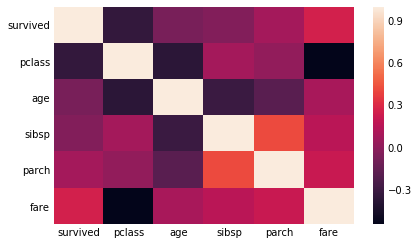

In [48]:
# Use Seaborn to plot a correlation heatmap
sns.heatmap(titanic.corr());

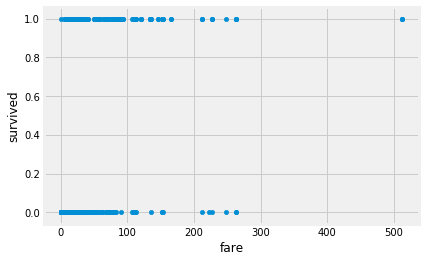

In [49]:
# Take a closer look at survived and fare using a scatter plot
titanic.plot.scatter(x='fare', y='survived');
# Is correlation a good way to inspect the association of fare and survival?

<a id="the-normal-distribution"></a>
## The Normal Distribution
---

- **Objective:** Identify a normal distribution within a data set using summary statistics and data visualizations.

###  Math Review
- What is an event space?
  - A listing of all possible occurrences.
- What is a probability distribution?
  - A function that describes how events occur in an event space.
- What are general properties of probability distributions?
  - All probabilities of an event are between 0 and 1.
  - The probability that something occurs is almost certain, or 1.
  

<a id="what-is-the-normal-distribution"></a>
### What is the Normal Distribution?
- A normal distribution is often a key assumption to many models.
  - In practice, if the normal distribution assumption is not met, it's not the end of the world. Your model is just less efficient in most cases.

- The normal distribution depends on the mean and the standard deviation.

- The mean determines the center of the distribution. The standard deviation determines the height and width of the distribution.

- Normal distributions are symmetric, bell-shaped curves.

- When the standard deviation is large, the curve is short and wide.

- When the standard deviation is small, the curve is tall and narrow.

![normal distribution](../assets/images/normal.png)


#### Why do we care about normal distributions?

- They often show up in nature.
- Aggregated processes tend to distribute normally, regardless of their underlying distribution — provided that the processes are uncorrelated or weakly correlated (central limit theorem).
- They offer effective simplification that makes it easy to make approximations.

#### Plot a histogram of 1,000 samples from a random normal distribution:

The `np.random.randn(numsamples)` function will draw from a random normal distribution with a mean of 0 and a standard deviation of 1.

- To plot a histogram, pass a NumPy array with 1000 samples as the only parameter to `plt.hist()`.
- Change the number of bins using the keyword argument `bins`, e.g. `plt.hist(mydata, bins=50)`

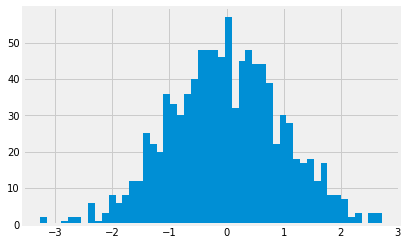

In [50]:
# Plot a histogram of several random normal samples from NumPy.
plt.hist(np.random.randn(1000), bins=50);

<a id="skewness"></a>
###  Skewness
- Skewness is a measure of the asymmetry of the distribution of a random variable about its mean.
- Skewness can be positive or negative, or even undefined.
- Notice that the mean, median, and mode are the same when there is no skew.

![skewness](../assets/images/skewness---mean-median-mode.jpg)

#### Plot a lognormal distribution generated with NumPy.

Take 1,000 samples using `np.random.lognormal(size=numsamples)` and plot them on a histogram.

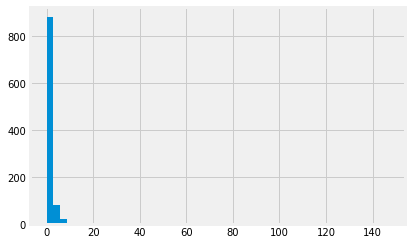

In [51]:
# Plot a lognormal distribution generated with NumPy
plt.hist(np.random.lognormal(size=1000), bins=50);

#####  Real World Application - When mindfullness beats complexity
- Skewness is surprisingly important.
- Most algorithms implicitly use the mean by default when making approximations.
- If you know your data is heavily skewed, you may have to either transform your data or set your algorithms to work with the median.

<a id="kurtosis"></a>
### Kurtosis
- Kurtosis is a measure of whether the data are peaked or flat, relative to a normal distribution.
- Data sets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly, and have heavy tails. 

![kurtosis](../assets/images/kurtosis.jpg)

####  Real-World Application: Risk Analysis
- Long-tailed distributions with high kurtosis elude intuition; we naturally think the event is too improbable to pay attention to.
- It's often the case that there is a large cost associated with a low-probability event, as is the case with hurricane damage.
- It's unlikely you will get hit by a Category 5 hurricane, but when you do, the damage will be catastrophic.
- Pay attention to what happens at the tails and whether this influences the problem at hand.
- In these cases, understanding the costs may be more important than understanding the risks.

<a id="determining-the-distribution-of-your-data"></a>
## Determining the Distribution of Your Data
---

**Objective:** Create basic data visualizations, including scatterplots, box plots, and histograms.

![](../assets/images/distributions.png)

#### Use the `.hist()` function of your Titantic DataFrame to plot histograms of all the variables in your data.

- The function `plt.hist(data)` calls the Matplotlib library directly.
- However, each DataFrame has its own `hist()` method that by default plots one histogram per column. 
- Given a DataFrame `my_df`, it can be called like this: `my_df.hist()`. 

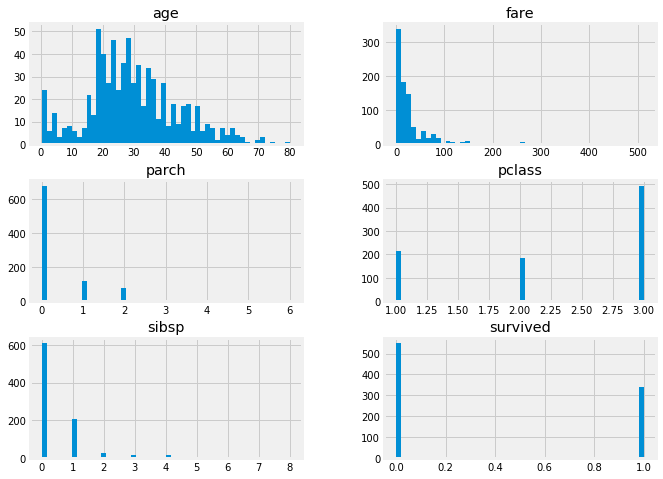

In [52]:
# Plot all variables in titanic using histograms
titanic.hist(figsize=(10, 8), bins=50);

#### Use the built-in `.plot.box()` function of your Titanic DataFrame to plot box plots of your variables.

- Given a DataFrame, a box plot can be made where each column is one tick on the x axis.
- To do this, it can be called like this: `my_df.plot.box()`.
- Try using the keyword argument `showfliers`, e.g. `showfliers=False`.

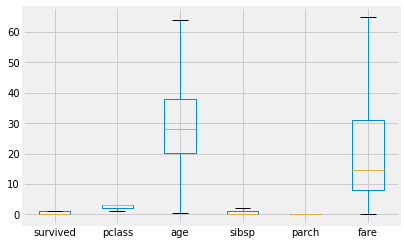

In [56]:
# Plotting all histograms can be unweildly, boxplots can be more concise
titanic.plot.box(showfliers=False);

<a id="exercise"></a>
### Exercise

1. Look at the Titanic data variables.
- Are any of them normal?
- Are any skewed?
- How might this affect our modeling?

![](../assets/images/visualization_flow_chart.jpg)

<a id="topic-review"></a>
## Lesson Review
---

- We covered several different types of summary statistics, what are they?
- We covered three different types of visualizations, which ones?
- Describe bias and variance and why they are important.
- What are some important characteristics of distributions?

**Any further questions?**